# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import math
import pprint

# Import API key
from api_keys import weather_api_key, weather_api_key_ben

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
output_data_file

'output_data/cities.csv'

## Generate Cities List

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#query link
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key_ben}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=d0f2c118a59e375cab26298053503fbe&units=imperial&q=


In [40]:
#Loop over cities
#f string to structure
#use mod for record
# Data Frame for later

city_api_df = pd.DataFrame(columns=["City","Latitude", "Longitude", "Temperature (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (mph)"])
print(f"Beginning Data Retrieval\n" \
"-----------------------------")
counter = 0
records = 50
for city in cities:
    current_record = (counter % records) + 1
    current_set = math.ceil((counter + 1) / records)
    try:
        response = requests.get(query_url + str(city)).json()
        if response["cod"] == 200:
            print(f"Processing Record {current_record} of Set {current_set} | {city}")
            city_api_df = city_api_df.append({
                "City": response["name"],
                "Latitude": response["coord"]["lat"],
                "Longitude": response["coord"]["lon"],
                "Temperature (F)": response["main"]["temp"],
                "Humidity (%)": response["main"]["humidity"],
                "Cloudiness (%)": response["clouds"]["all"],
                "Wind Speed (mph)": response["wind"]["speed"]
            }, ignore_index=True)
        else:
            raise ValueError()
    except ValueError:
        print(f"Error processing {city}.")
    counter += 1

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | ishigaki
Processing Record 4 of Set 1 | killybegs
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | faya
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | lompoc
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | jorhat
Error processing taolanaro.
Processing Record 16 of Set 1 | clyde river
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | plouzane
Processing Record 19 of Set 1 | kijang
Processing Record 20 of Set 1 | paoua
Processing Record 21 of Set 1 | xinzhou
Processing Record 22 of Set 1 | busselton
Processing Record 23 of Set 1 | avarua
Processing Record 24 of Set 1 | los 

Processing Record 5 of Set 5 | kembe
Processing Record 6 of Set 5 | sena madureira
Processing Record 7 of Set 5 | shelburne
Processing Record 8 of Set 5 | guacimo
Processing Record 9 of Set 5 | carauari
Processing Record 10 of Set 5 | tuktoyaktuk
Processing Record 11 of Set 5 | vestmannaeyjar
Processing Record 12 of Set 5 | sistranda
Processing Record 13 of Set 5 | portland
Processing Record 14 of Set 5 | luorong
Processing Record 15 of Set 5 | palm coast
Processing Record 16 of Set 5 | lebu
Processing Record 17 of Set 5 | botshabelo
Processing Record 18 of Set 5 | zhanaozen
Processing Record 19 of Set 5 | fairbanks
Processing Record 20 of Set 5 | bogyiszlo
Processing Record 21 of Set 5 | ewa beach
Processing Record 22 of Set 5 | vila franca do campo
Processing Record 23 of Set 5 | norman wells
Processing Record 24 of Set 5 | ilulissat
Processing Record 25 of Set 5 | itarema
Processing Record 26 of Set 5 | ancud
Processing Record 27 of Set 5 | waddan
Error processing illoqqortoormiut.


Processing Record 9 of Set 9 | sens
Processing Record 10 of Set 9 | kaseda
Processing Record 11 of Set 9 | anadyr
Processing Record 12 of Set 9 | blackwater
Processing Record 13 of Set 9 | vila velha
Processing Record 14 of Set 9 | bonavista
Processing Record 15 of Set 9 | plettenberg bay
Processing Record 16 of Set 9 | green river
Processing Record 17 of Set 9 | sisimiut
Processing Record 18 of Set 9 | sahibganj
Error processing toliary.
Processing Record 20 of Set 9 | naron
Processing Record 21 of Set 9 | springdale
Processing Record 22 of Set 9 | linxia
Processing Record 23 of Set 9 | pemberton
Processing Record 24 of Set 9 | nadym
Processing Record 25 of Set 9 | mitu
Processing Record 26 of Set 9 | tommot
Processing Record 27 of Set 9 | hendek
Processing Record 28 of Set 9 | bradford
Processing Record 29 of Set 9 | fare
Processing Record 30 of Set 9 | maumere
Processing Record 31 of Set 9 | saint anthony
Processing Record 32 of Set 9 | gamba
Processing Record 33 of Set 9 | baruun-u

In [41]:
city_api_df.head()

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Dikson,73.51,80.55,43.18,86,100,13.56
1,Vaini,-21.20,-175.20,75.20,73,40,8.05
2,Ishigaki,24.34,124.16,82.40,88,40,4.70
3,Killybegs,54.63,-8.45,61.00,84,100,5.01
4,Rikitea,-23.12,-134.97,73.83,82,0,12.01


In [43]:
# Testing code above, bug fixing except not triggering.
len(city_api_df)

560

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [44]:
city_api_df.to_csv("city_data.csv", index = False)

In [45]:
city_api_df.head()

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Dikson,73.51,80.55,43.18,86,100,13.56
1,Vaini,-21.20,-175.20,75.20,73,40,8.05
2,Ishigaki,24.34,124.16,82.40,88,40,4.70
3,Killybegs,54.63,-8.45,61.00,84,100,5.01
4,Rikitea,-23.12,-134.97,73.83,82,0,12.01


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [47]:
#  Get the indices of cities that have humidity over 100%.
city_api_df[(city_api_df["Humidity (%)"] > 100)].index

Int64Index([], dtype='int64')

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [63]:
def plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

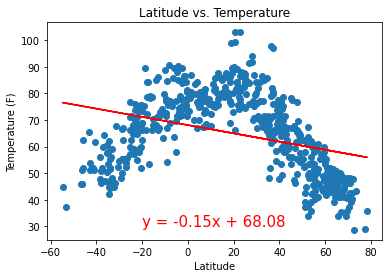

In [59]:
x_values = city_api_df["Latitude"]
y_values = city_api_df["Temperature (F)"]
title = "Latitude vs. Temperature"
x_label = "Latitude"
y_label = "Temperature (F)"
text_coordinates = (-20,30)
plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates)

## Latitude vs. Humidity Plot

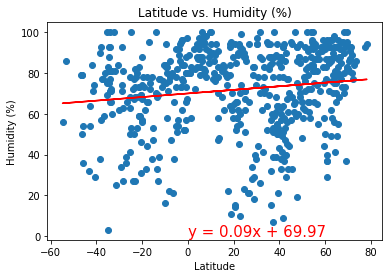

In [77]:
# Finish later
city_api_df["Humidity (%)"] = city_api_df["Humidity (%)"].fillna(0)
x_values = city_api_df["Latitude"]
y_values = city_api_df["Humidity (%)"]
title = "Latitude vs. Humidity (%)"
x_label = "Latitude"
y_label = "Humidity (%)"
text_coordinates = (0,0)
plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates)

## Latitude vs. Cloudiness Plot

In [ ]:
# Finish later

## Latitude vs. Wind Speed Plot

In [ ]:
# Finish later

## Linear Regression

In [ ]:
# Already complete

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

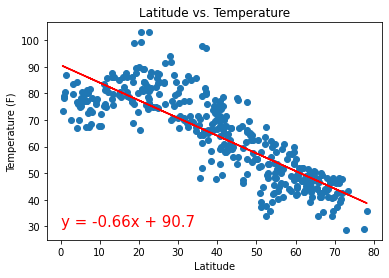

In [72]:
north_hemi = city_api_df[city_api_df["Latitude"] > 0]
x_values_p = north_hemi["Latitude"]
y_values_p = north_hemi["Temperature (F)"]
title_p = "Latitude vs. Temperature"
x_label_p = "Latitude"
y_label_p = "Temperature (F)"
text_coordinates_p = (0,30)
plot_linear_regression(x_values_p, y_values_p, title_p, x_label_p, y_label_p, text_coordinates_p)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression